#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [ ]:
dataset[dataset.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [ ]:
dataset = dataset.drop_duplicates()

Periksa apakah ada missing values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


Periksa outlier dengan boxplot untuk setiap kolom feature

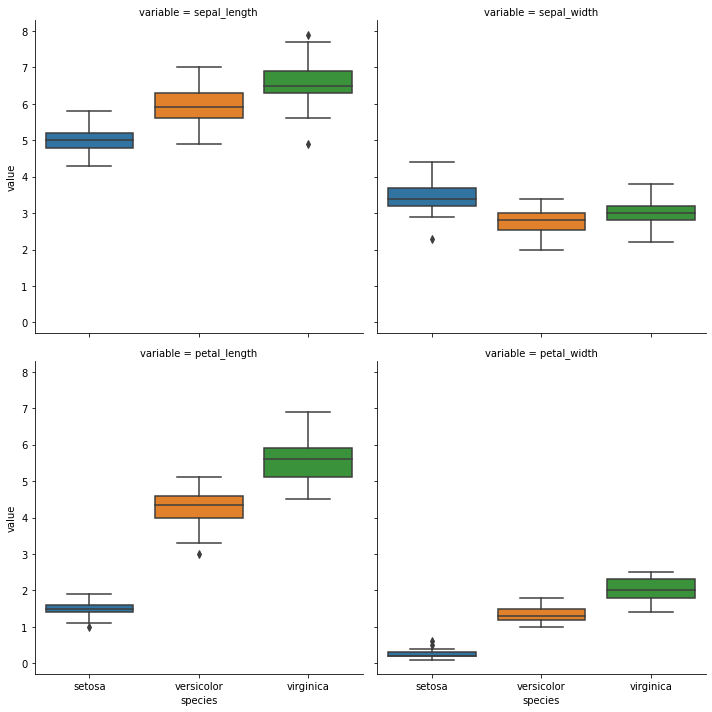

In [ ]:
iris = dataset.melt(id_vars='species')
sns.catplot(data=iris, x='species', y='value',col='variable', kind='box', col_wrap=2)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [ ]:
X = dataset[['sepal_length','sepal_width','petal_length','petal_width']]
y = dataset['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [ ]:
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
X_pred = classifier.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, X_pred))

print("Accuracy Score: ", accuracy_score(y_test, X_pred))

Confusion Matrix:  [[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy Score:  1.0


Uji model dengan dataset test

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor']


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [ ]:
model = GaussianNB()

Uji hasil model dengan data test

In [ ]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Ukur akurasi dari model persamaan Naive Bayes Classifier

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[5 2 0]
 [0 3 1]
 [0 0 4]]
Accuracy Score:  0.8


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [ ]:
y_pred = classifier.predict(X_test)

Ukur akurasi dari model K-Nearest Neighbor

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
dataset = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", dataset)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy Score:  1.0


#Kesimpulan
Dari klasifikasi 3 model diatas memiliki nilai akurasi yang sama dari masing-masing setiap model